In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
import plotly.express as px

# reading in each datsets, check number of zeros and whether or not the row sum is 1

In [8]:
data = pd.read_csv("coverm_431_MAGS_metagenomes_reads_count.csv")
data=data.T
data

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
Genome,Ga0485157_maxbin.014,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.078,Ga0485157_maxbin.107,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.139_sub,Ga0485157_metabat1.033_sub,Ga0485157_metabat1.036,Ga0485157_metabat1.038,Ga0485157_metabat1.040,...,Ga0485172_maxbin.091_sub,Ga0485172_maxbin.094_sub,Ga0485172_metabat1.031,Ga0485172_metabat2_ours.019,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.152
2020-10-19_23.5m,46270,1065,455158,89649,186416,89954,13779,61455,35292,13238,...,69897,171871,385003,163164,40421,590124,71678,1933192,170940,103723
2020-10-08_15m,69148,623,420808,126022,112909,55863,6327,27215,8040,3367,...,83492,338543,1090115,67899,10088,471585,49336,1510610,296074,44874
2020-10-19_15m,22880,425,318593,56715,137337,46022,3809,14496,4678,1801,...,54676,124716,299777,147592,28328,224216,99141,1371440,142060,80402
2020-09-11_15m,221944,1056,63198,37802,242087,54164,252651,2262445,494337,136806,...,14228,24254,34342,3179,11535,45766,9845,80612,5709,43216
2020-08-05_15m,125718,25795,55400,23701,184051,47396,725393,3392127,1069140,131436,...,3715,21184,30097,2498,10754,12088,6115,99934,4693,31929
2020-08-25_10m,932657,355,188829,135055,89288,120811,70819,942226,287950,16272,...,89200,257952,25380,25438,5179,22932,68120,245570,93655,31169
2020-07-24_5m,672567,108,107239,379191,85609,43725,2382,8850,2905,1093,...,14986,275103,57297,3141,1768,562,41932,66300,25860,6007
2020-07-24_23.5m,186670,28941,88014,24601,161421,45468,457820,542540,920121,135709,...,1704,15432,304788,9978,26700,5961,2150,91971,5491,35477
2020-07-24_15m,312670,92010,174684,62506,275145,192646,742934,1381224,748896,423415,...,2683,30075,176785,31853,44338,18976,7535,216503,13121,159133


In [9]:

##no missing values for the count datasets

zeros_per_col = (data == 0).sum(axis=0)

# Count the number of zeros in each row
zeros_per_row = (data == 0).sum(axis=1)
sum(zeros_per_col)+sum(zeros_per_row)

0

In [10]:
data.columns = data.iloc[0]

# drop the first row
data= data.iloc[1:]
data

Genome,Ga0485157_maxbin.014,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.078,Ga0485157_maxbin.107,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.139_sub,Ga0485157_metabat1.033_sub,Ga0485157_metabat1.036,Ga0485157_metabat1.038,Ga0485157_metabat1.040,...,Ga0485172_maxbin.091_sub,Ga0485172_maxbin.094_sub,Ga0485172_metabat1.031,Ga0485172_metabat2_ours.019,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.152
2020-10-19_23.5m,46270,1065,455158,89649,186416,89954,13779,61455,35292,13238,...,69897,171871,385003,163164,40421,590124,71678,1933192,170940,103723
2020-10-08_15m,69148,623,420808,126022,112909,55863,6327,27215,8040,3367,...,83492,338543,1090115,67899,10088,471585,49336,1510610,296074,44874
2020-10-19_15m,22880,425,318593,56715,137337,46022,3809,14496,4678,1801,...,54676,124716,299777,147592,28328,224216,99141,1371440,142060,80402
2020-09-11_15m,221944,1056,63198,37802,242087,54164,252651,2262445,494337,136806,...,14228,24254,34342,3179,11535,45766,9845,80612,5709,43216
2020-08-05_15m,125718,25795,55400,23701,184051,47396,725393,3392127,1069140,131436,...,3715,21184,30097,2498,10754,12088,6115,99934,4693,31929
2020-08-25_10m,932657,355,188829,135055,89288,120811,70819,942226,287950,16272,...,89200,257952,25380,25438,5179,22932,68120,245570,93655,31169
2020-07-24_5m,672567,108,107239,379191,85609,43725,2382,8850,2905,1093,...,14986,275103,57297,3141,1768,562,41932,66300,25860,6007
2020-07-24_23.5m,186670,28941,88014,24601,161421,45468,457820,542540,920121,135709,...,1704,15432,304788,9978,26700,5961,2150,91971,5491,35477
2020-07-24_15m,312670,92010,174684,62506,275145,192646,742934,1381224,748896,423415,...,2683,30075,176785,31853,44338,18976,7535,216503,13121,159133
2020-08-25_15m,149383,2413,37886,19780,176946,41036,405062,3031265,311711,58312,...,7396,19681,31343,2732,8137,9172,7158,75146,3291,28465


Text(0, 0.5, 'total count of genome')

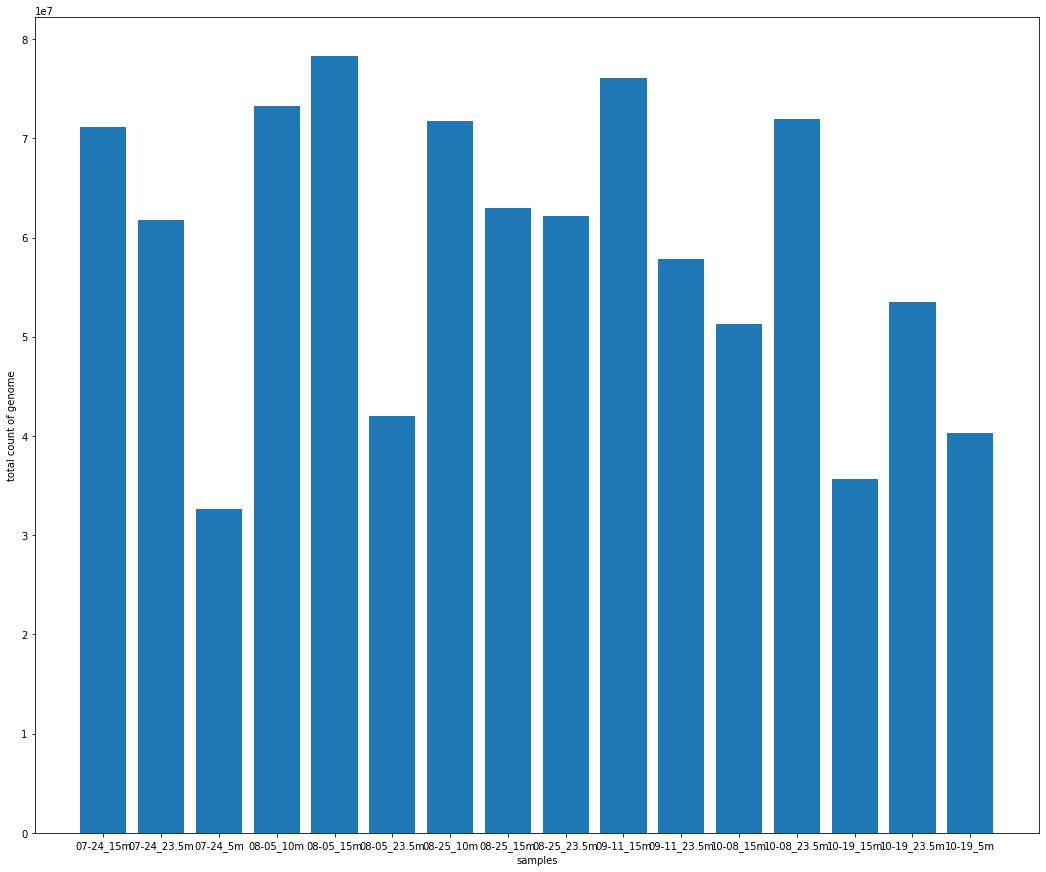

In [11]:
#the count for all the genome per sample
#count dataset
plt.figure(figsize=(18,15))
row_sums_count = data_sorted.sum(axis=1)
keys = list(map(lambda x: x[5:],row_sums_count.to_dict().keys()))
values = list(row_sums_count.to_dict().values())

# Plot the bar plot
plt.bar(keys, values)
plt.xlabel('samples')
plt.ylabel('total count of genome')

In [12]:
MAG_abundance = pd.read_table("Fw_ lake mendota data(envirrmental)/MAG_abundance_matrix_rel_abund.tsv")

MAG_abundance=MAG_abundance.drop(MAG_abundance.index[-1])
MAG_abundance=MAG_abundance.T
MAG_abundance.columns = MAG_abundance.iloc[0]

# # drop the first row
MAG_abundance= MAG_abundance.iloc[1:]
MAG_abundance


Genome,Ga0485157_maxbin.014,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.078,Ga0485157_maxbin.107,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.139_sub,Ga0485157_metabat1.033_sub,Ga0485157_metabat1.036,Ga0485157_metabat1.038,Ga0485157_metabat1.040,...,Ga0485172_maxbin.091_sub,Ga0485172_maxbin.094_sub,Ga0485172_metabat1.031,Ga0485172_metabat2_ours.019,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.152
2020-07-24_15m,0.117755,0.100192,0.299905,0.066062,0.140797,0.109071,0.544828,0.573398,0.328675,0.203605,...,0.002524,0.013194,0.148374,0.046344,0.100247,0.009963,0.01044,0.468255,0.012078,0.289957
2020-07-24_23.5m,0.073226,0.032268,0.165349,0.026422,0.083689,0.024322,0.350594,0.231684,0.428294,0.068605,...,0.0,0.006457,0.273447,0.015499,0.063381,0.0,0.0,0.210432,0.005278,0.067263
2020-07-24_5m,0.333481,0.0,0.253413,0.552469,0.053981,0.031273,0.0,0.003243,0.0,0.0,...,0.019672,0.191101,0.064504,0.005011,0.00479,0.0,0.086671,0.186031,0.031172,0.009624
2020-08-05_10m,0.380846,0.0,0.091699,0.169806,0.098526,0.09258,0.247334,1.380923,0.120773,0.045596,...,0.029603,0.07272,0.056467,0.009132,0.006102,0.027897,0.0282,0.299497,0.007916,0.128026
2020-08-05_15m,0.056495,0.033347,0.107147,0.029263,0.109279,0.027385,0.642494,1.733823,0.571462,0.075933,...,0.004266,0.01073,0.028921,0.004118,0.029221,0.007597,0.009525,0.262046,0.005079,0.069146
2020-08-05_23.5m,0.087003,0.010708,0.181576,0.059115,0.106062,0.021836,0.219954,0.198924,0.309603,0.076,...,0.005544,0.008831,0.260488,0.014738,0.065057,0.0,0.004689,0.206991,0.004378,0.076583
2020-08-25_10m,0.30202,0.0,0.284656,0.123726,0.036621,0.056928,0.04107,0.33738,0.109191,0.006501,...,0.086164,0.113959,0.017256,0.030946,0.009442,0.011312,0.092446,0.460155,0.077506,0.045342
2020-08-25_15m,0.080593,0.003592,0.088291,0.029302,0.126906,0.029746,0.426716,1.852991,0.198413,0.039835,...,0.011059,0.012472,0.036575,0.005446,0.026355,0.007118,0.014058,0.235458,0.004236,0.074386
2020-08-25_23.5m,0.146517,0.00328,0.157284,0.060137,0.096434,0.02441,0.15412,0.221276,0.238669,0.12219,...,0.01079,0.011477,0.073085,0.00957,0.05547,0.002766,0.00692,0.156388,0.003363,0.084241
2020-09-11_15m,0.092857,0.0,0.116329,0.044558,0.137028,0.032052,0.205784,1.073785,0.244517,0.073555,...,0.016473,0.012268,0.031112,0.004961,0.028913,0.02982,0.015436,0.196244,0.005767,0.087657


In [49]:
# zeros_per_col_MAG_abundance = (MAG_abundance == 0).sum(axis=0)

# # Count the number of zeros in each row
# zeros_per_row_MAG_abundance= (MAG_abundance == 0).sum(axis=1)
num_zeros_MAG_abundance= (MAG_abundance == 0).sum().sum()
print('the number of zeros:',num_zeros_MAG_abundance)
zero_percent_MAG_abundance=((num_zeros_MAG_abundance)/ MAG_abundance.size)* 100
print('Percentage of zeros: {:.2f}%'.format(zero_percent_MAG_abundance))

the number of zeros: 1384
Percentage of zeros: 20.07%


In [42]:
row_sums_MAG_abundance= MAG_abundance.sum(axis=1)
row_sums_MAG_abundance

2020-07-24_15m      51.388456
2020-07-24_23.5m    41.211519
2020-07-24_5m       33.847230
2020-08-05_10m      55.278206
2020-08-05_15m      54.719929
2020-08-05_23.5m    39.912086
2020-08-25_10m      45.643490
2020-08-25_15m      53.954127
2020-08-25_23.5m    43.067711
2020-09-11_15m      51.559964
2020-09-11_23.5m    43.448078
2020-10-08_15m      38.991339
2020-10-08_23.5m    39.313672
2020-10-19_15m      29.948284
2020-10-19_23.5m    38.422739
2020-10-19_5m       30.432611
dtype: float64

Text(0, 0.5, 'total count of genome')

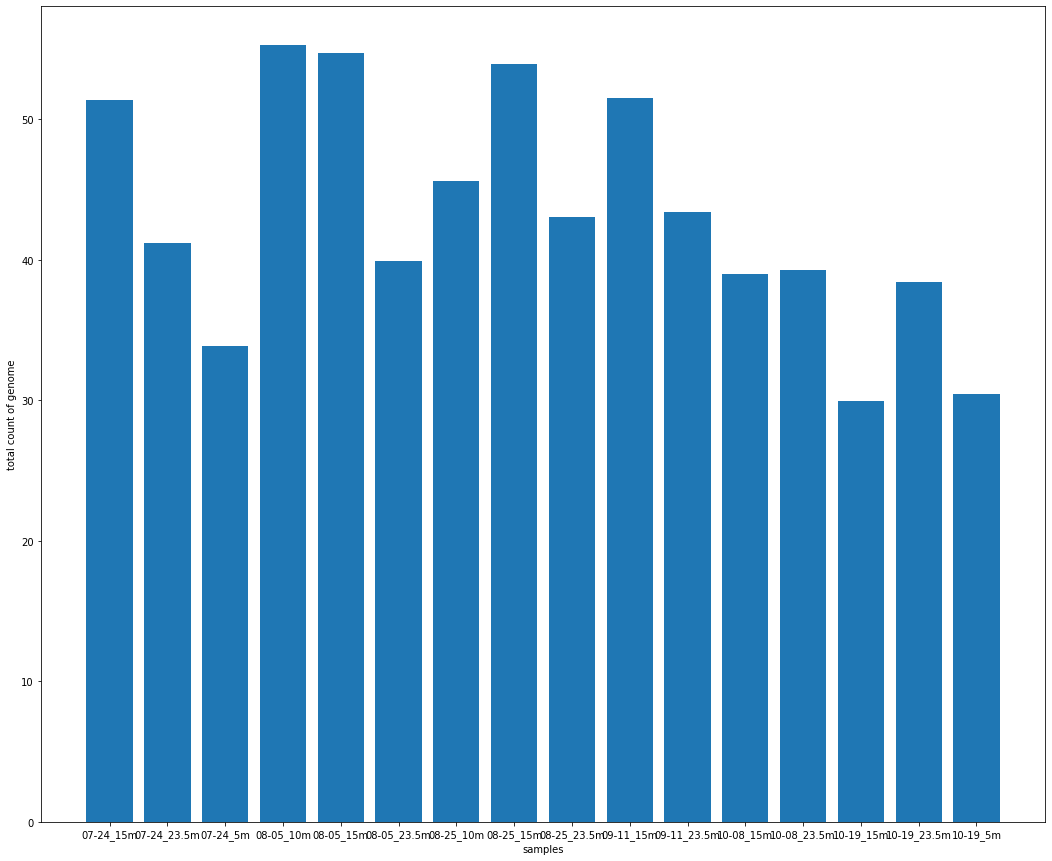

In [43]:
#row sum plot of abundance matrix
plt.figure(figsize=(18,15))
x_ax=list(map(lambda x: x[5:],row_sums_MAG_abundance.index))
plt.bar(x=x_ax, height=row_sums_MAG_abundance.values)
plt.xlabel('samples')
plt.ylabel('total count of genome')

In [44]:
MAG_RPKM_normalized= pd.read_table("Fw_ lake mendota data(envirrmental)/MAG_RPKM_normalized.tsv")

MAG_RPKM_normalized=MAG_RPKM_normalized.T
MAG_RPKM_normalized.columns = MAG_RPKM_normalized.iloc[0]

# # drop the first row
MAG_RPKM_normalized= MAG_RPKM_normalized.iloc[1:]
MAG_RPKM_normalized


Genome,Ga0485172_metabat2_ours.152,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.019,Ga0485172_metabat1.031,Ga0485172_maxbin.094_sub,Ga0485172_maxbin.091_sub,...,Ga0485157_metabat1.040,Ga0485157_metabat1.038,Ga0485157_metabat1.036,Ga0485157_metabat1.033_sub,Ga0485157_maxbin.139_sub,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.107,Ga0485157_maxbin.078,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.014
2020-07-24_5m,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.0
2020-07-24_15m,0.000001,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.000001,0.0
2020-07-24_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0
2020-08-05_10m,0.000001,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05_15m,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000002,0.000001,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0
2020-08-25_10m,0.0,0.0,0.000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25_15m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-11_15m,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
num_zeros_MAG_RPKM_normalized= (MAG_RPKM_normalized== 0).sum().sum()
print('the number of zeros:',num_zeros_MAG_RPKM_normalized)
zero_percent_MAG_RPKM_normalized=((num_zeros_MAG_RPKM_normalized)/ MAG_RPKM_normalized.size)* 100
print('Percentage of zeros: {:.2f}%'.format(zero_percent_MAG_RPKM_normalized))

the number of zeros: 5893
Percentage of zeros: 85.46%


In [36]:
# sum_
# MAG_RPKM_normalized.shape[0] * MAG_RPKM_normalized.shape[1]
# print(MAG_RPKM_normalized.size)
zeros_per_row_MAG_RPKM_normalized

2020-07-24_5m       373
2020-07-24_15m      318
2020-07-24_23.5m    375
2020-08-05_10m      356
2020-08-05_15m      327
2020-08-05_23.5m    385
2020-08-25_10m      390
2020-08-25_15m      351
2020-08-25_23.5m    365
2020-09-11_15m      363
2020-09-11_23.5m    380
2020-10-08_15m      379
2020-10-08_23.5m    384
2020-10-19_5m       385
2020-10-19_15m      389
2020-10-19_23.5m    373
dtype: int64

In [28]:
row_sums_MAG_RPKM_normalized= MAG_RPKM_normalized.sum(axis=1)
row_sums_MAG_RPKM_normalized

2020-07-24_5m       0.000166
2020-07-24_15m      0.000125
2020-07-24_23.5m    0.000204
2020-08-05_10m      0.000183
2020-08-05_15m      0.000118
2020-08-05_23.5m    0.000178
2020-08-25_10m      0.000955
2020-08-25_15m      0.000080
2020-08-25_23.5m    0.000108
2020-09-11_15m      0.000110
2020-09-11_23.5m    0.000094
2020-10-08_15m      0.000608
2020-10-08_23.5m    0.000082
2020-10-19_5m       0.000977
2020-10-19_15m      0.001004
2020-10-19_23.5m    0.000793
dtype: float64

Text(0, 0.5, 'total count of genome')

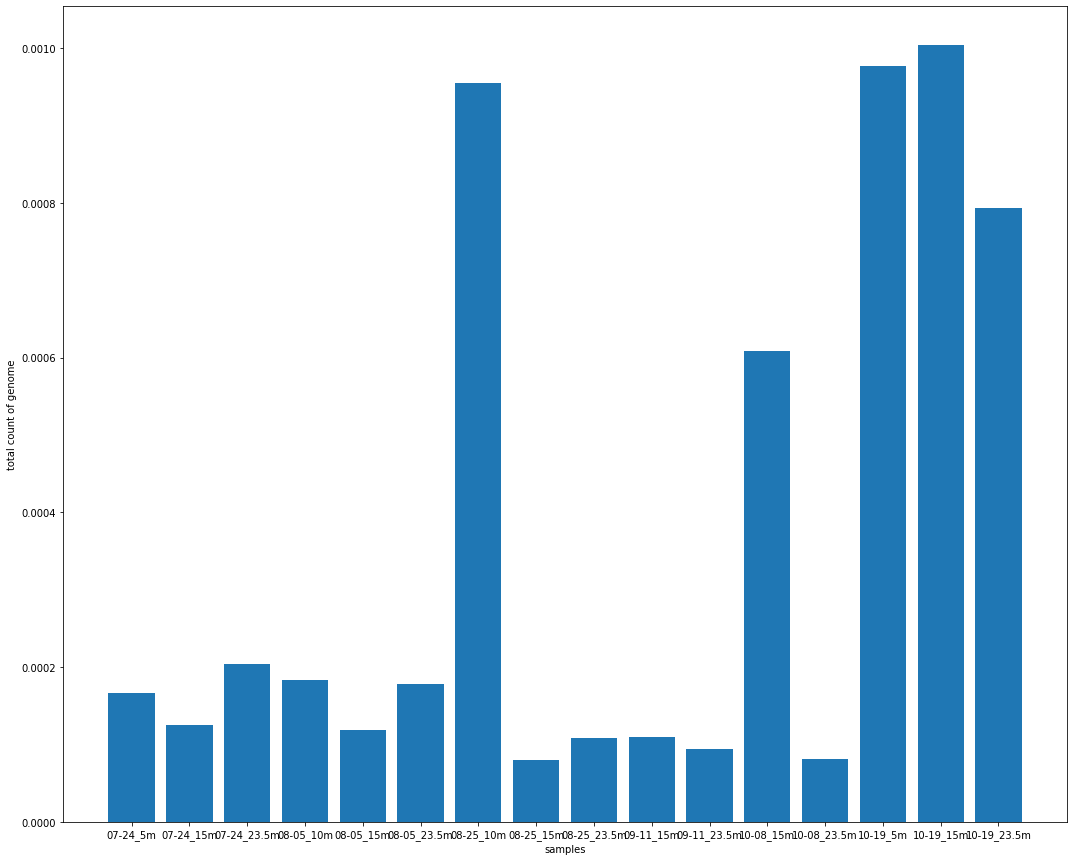

In [50]:
plt.figure(figsize=(18,15))
x_ax_3=list(map(lambda x: x[5:],row_sums_MAG_RPKM_normalized.index))
plt.bar(x=x_ax_3, height=row_sums_MAG_RPKM_normalized.values)
plt.xlabel('samples')
plt.ylabel('total count of genome')

In [51]:
phages_abundance_matrix_metagenomes= pd.read_table("Fw_ lake mendota data(envirrmental)/phages_abundance_matrix_metagenomes.tsv")

phages_abundance_matrix_metagenomes=phages_abundance_matrix_metagenomes.drop(phages_abundance_matrix_metagenomes.index[0])
phages_abundance_matrix_metagenomes=phages_abundance_matrix_metagenomes.T

phages_abundance_matrix_metagenomes.columns =phages_abundance_matrix_metagenomes.iloc[0]

# # # drop the first row
phages_abundance_matrix_metagenomes= phages_abundance_matrix_metagenomes.iloc[1:]
phages_abundance_matrix_metagenomes



Phage,Ga0485173_0003289,Ga0485182_002248,Ga0485179_017583,Ga0485157_0000495,Ga0485182_000222,Ga0485186_0000349,Ga0485175_0000843,Ga0485159_0000197,Ga0485178_002261,Ga0485181_002546,...,Ga0485158_0000222,Ga0485185_000241,Ga0485161_0002159,Ga0485176_0000599,Ga0485177_0000534,Ga0485159_0000287,Ga0485186_0000094,Ga0485176_0000029,Ga0485173_0000545,Ga0485175_0000421
2020-10-19_23.5m,0.000049,0.000248,0.000127,0.000201,0.0,0.0,0.000042,0.0,0.0,0.0,...,0.000044,0.000076,0.000182,0.0,0.0,0.000053,0.000094,0.0,0.0,0.0
2020-10-08_15m,0.0,0.000297,0.00004,0.00003,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000052,0.00017,0.0,0.0,0.000022,0.0,0.0,0.0,0.0
2020-10-19_15m,0.0,0.000228,0.000061,0.000134,0.0,0.0,0.000026,0.0,0.0,0.0,...,0.000032,0.000042,0.000089,0.0,0.0,0.000028,0.000078,0.0,0.0,0.0
2020-09-11_15m,0.000167,0.000022,0.000245,0.000337,0.0,0.000017,0.000128,0.0,0.000039,0.000051,...,0.00005,0.000021,0.00092,0.000073,0.000232,0.0,0.0,0.0,0.000019,0.000104
2020-08-05_15m,0.000232,0.000034,0.000292,0.001826,0.0,0.000036,0.000124,0.0,0.000049,0.000083,...,0.000078,0.000056,0.002065,0.000139,0.000112,0.0,0.0,0.0,0.000045,0.00006
2020-08-25_10m,0.000097,0.0,0.000084,0.00003,0.0,0.00021,0.0,0.000029,0.000036,0.0,...,0.0,0.000482,0.00047,0.000058,0.000023,0.00012,0.0,0.0,0.0,0.0
2020-07-24_5m,0.000981,0.000044,0.0,0.000152,0.0,0.0,0.000077,0.005664,0.000504,0.000077,...,0.0,0.0,0.00012,0.000401,0.00016,0.003327,0.0,0.0,0.000379,0.0
2020-07-24_23.5m,0.000296,0.000045,0.000663,0.000404,0.0,0.000155,0.000294,0.0,0.000655,0.000808,...,0.000353,0.0,0.000759,0.001324,0.000447,0.000064,0.0,0.0,0.000117,0.005495
2020-07-24_15m,0.000244,0.000021,0.001425,0.005374,0.0,0.0,0.000123,0.0,0.000082,0.00009,...,0.000034,0.0,0.001417,0.000135,0.00005,0.0,0.0,0.0,0.000075,0.000202
2020-08-25_15m,0.00021,0.0,0.000158,0.000648,0.0,0.000027,0.000165,0.0,0.000057,0.000134,...,0.000057,0.0,0.001614,0.000165,0.00027,0.0,0.0,0.0,0.000037,0.000146


In [57]:
num_zeros_phages_abundance_matrix_metagenomes= (phages_abundance_matrix_metagenomes== 0).sum().sum()
print('the number of zeros:',num_zeros_phages_abundance_matrix_metagenomes)
zero_percent_phages_abundance_matrix_metagenomes=((num_zeros_phages_abundance_matrix_metagenomes)/ phages_abundance_matrix_metagenomes.size)* 100
print('Percentage of zeros: {:.2f}%'.format(zero_percent_phages_abundance_matrix_metagenomes))

the number of zeros: 13125
Percentage of zeros: 36.52%


In [53]:
row_sums_phages_abundance_matrix_metagenomes= phages_abundance_matrix_metagenomes.sum(axis=1)
row_sums_phages_abundance_matrix_metagenomes

2020-10-19_23.5m    0.655490
2020-10-08_15m      0.653947
2020-10-19_15m      0.777846
2020-09-11_15m      0.504348
2020-08-05_15m      0.577252
2020-08-25_10m      0.468715
2020-07-24_5m       2.384052
2020-07-24_23.5m    2.011944
2020-07-24_15m      0.536729
2020-08-25_15m      0.560599
2020-10-08_23.5m    0.709240
2020-10-19_5m       0.826225
2020-09-11_23.5m    0.932316
2020-08-25_23.5m    1.253326
2020-08-05_23.5m    1.858483
2020-08-05_10m      0.525313
dtype: float64

Text(0, 0.5, 'total count of genome')

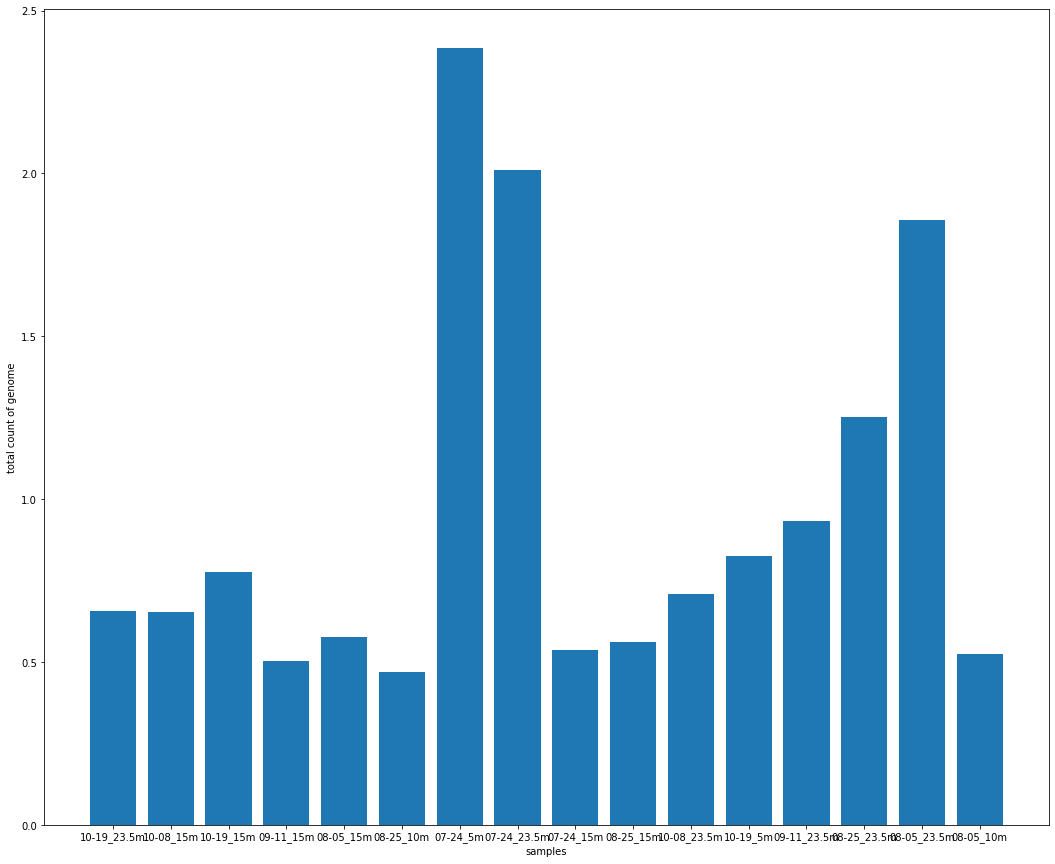

In [58]:
plt.figure(figsize=(18,15))
x_ax_2=list(map(lambda x: x[5:],row_sums_phages_abundance_matrix_metagenomes.index))
plt.bar(x=x_ax_2, height=row_sums_phages_abundance_matrix_metagenomes.values)
plt.xlabel('samples')
plt.ylabel('total count of genome')

In [59]:
phages_rpkm_normalized_matrix= pd.read_table("Fw_ lake mendota data(envirrmental)/phages_rpkm_normalized_matrix.tsv")
phages_rpkm_normalized_matrix=phages_rpkm_normalized_matrix.T

phages_rpkm_normalized_matrix.columns =phages_rpkm_normalized_matrix.iloc[0]

# # # # drop the first row
phages_rpkm_normalized_matrix= phages_rpkm_normalized_matrix.iloc[1:]
phages_rpkm_normalized_matrix

Phage,Ga0485157_0000400,Ga0485157_0000436,Ga0485157_0000450,Ga0485157_0000468,Ga0485157_0000495,Ga0485157_0000539,Ga0485157_0000643,Ga0485157_0001803,Ga0485157_0001822,Ga0485157_0002034,...,Ga0485186_0002199,Ga0485186_0002202,Ga0485186_0002230,Ga0485186_0002267,Ga0485186_0002291,Ga0485186_0002307,Ga0485186_0002695,Ga0485186_0003021,Ga0485186_0003386,Ga0485186_0021846
2020-07-24_15m,0.0,0.0,0.0,0.000343,0.000202,0.0,0.000639,0.0,0.000067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-24_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.000571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-24_5m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05_10m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05_15m,0.0,0.0,0.0,0.000285,0.00014,0.0,0.000472,0.0,0.000056,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.000939,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25_10m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25_15m,0.0,0.0,0.0,0.0,0.0,0.0,0.000575,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25_23.5m,0.0,0.0,0.0,0.0,0.0,0.0,0.000535,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-11_15m,0.0,0.0,0.0,0.0,0.0,0.0,0.000402,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
zeros_per_col_phages_rpkm_normalized_matrix= (phages_rpkm_normalized_matrix == 0).sum(axis=0)

# Count the number of zeros in each row
zeros_per_row_phages_rpkm_normalized_matrix= (phages_rpkm_normalized_matrix == 0).sum(axis=1)
sum(zeros_per_col_phages_rpkm_normalized_matrix)+sum(zeros_per_row_phages_rpkm_normalized_matrix)


num_zeros_phages_rpkm_normalized_matrix = (phages_rpkm_normalized_matrix == 0).sum().sum()
print('the number of zeros:',num_zeros_phages_rpkm_normalized_matrix)
zero_percent_phages_rpkm_normalized_matrix =((num_zeros_phages_rpkm_normalized_matrix)/phages_rpkm_normalized_matrix.size)* 100
print('Percentage of zeros: {:.2f}%'.format(zero_percent_phages_rpkm_normalized_matrix ))

the number of zeros: 34983
Percentage of zeros: 97.35%


In [64]:
row_sums_phages_rpkm_normalized_matrix= phages_rpkm_normalized_matrix.sum(axis=1)
row_sums_phages_rpkm_normalized_matrix

2020-07-24_15m      0.016504
2020-07-24_23.5m    0.040392
2020-07-24_5m       0.009160
2020-08-05_10m      0.024225
2020-08-05_15m      0.022192
2020-08-05_23.5m    0.057709
2020-08-25_10m      0.106863
2020-08-25_15m      0.015531
2020-08-25_23.5m    0.026158
2020-09-11_15m      0.021904
2020-09-11_23.5m    0.021430
2020-10-08_15m      0.030538
2020-10-08_23.5m    0.015622
2020-10-19_15m      0.057807
2020-10-19_23.5m    0.047207
2020-10-19_5m       0.051827
dtype: float64

Text(0, 0.5, 'total count of genome')

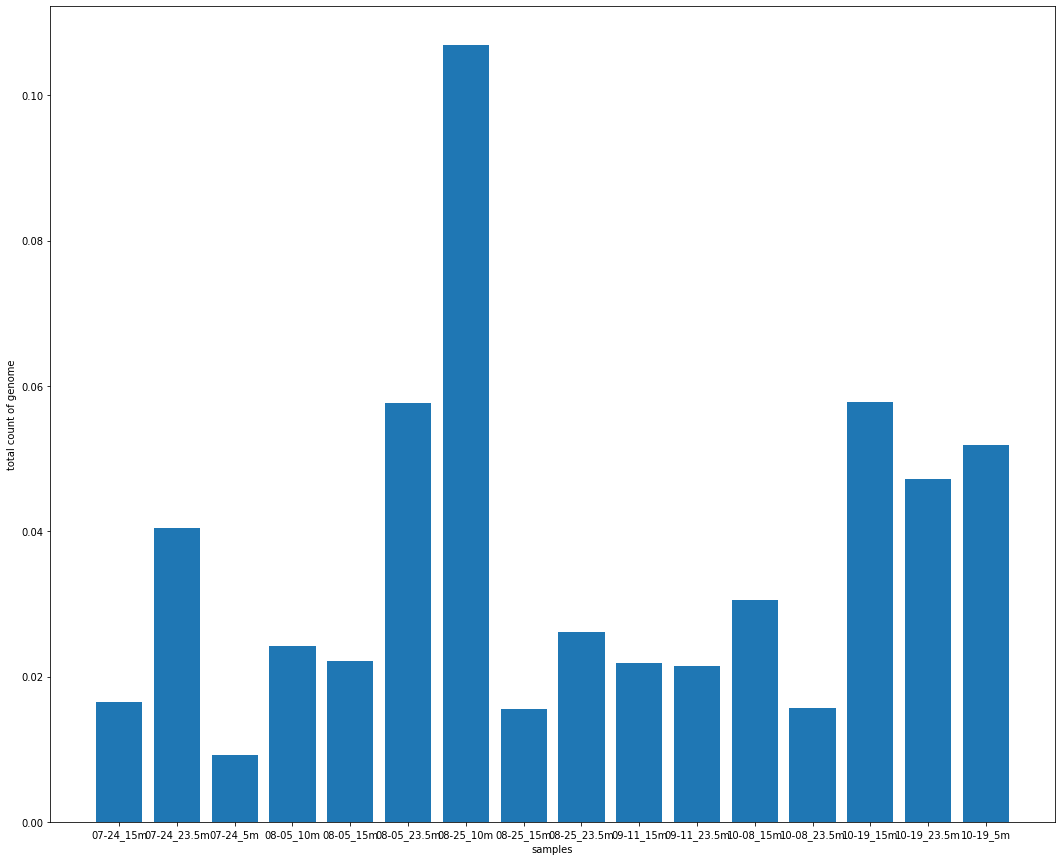

In [65]:
plt.figure(figsize=(18,15))
x_ax_1=list(map(lambda x: x[5:],row_sums_phages_rpkm_normalized_matrix.index))
plt.bar(x=x_ax_1, height=row_sums_phages_rpkm_normalized_matrix.values)
plt.xlabel('samples')
plt.ylabel('total count of genome')

In [66]:
data_sorted = data.sort_index(ascending=True)
data_sorted

Genome,Ga0485157_maxbin.014,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.078,Ga0485157_maxbin.107,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.139_sub,Ga0485157_metabat1.033_sub,Ga0485157_metabat1.036,Ga0485157_metabat1.038,Ga0485157_metabat1.040,...,Ga0485172_maxbin.091_sub,Ga0485172_maxbin.094_sub,Ga0485172_metabat1.031,Ga0485172_metabat2_ours.019,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.152
2020-07-24_15m,312670,92010,174684,62506,275145,192646,742934,1381224,748896,423415,...,2683,30075,176785,31853,44338,18976,7535,216503,13121,159133
2020-07-24_23.5m,186670,28941,88014,24601,161421,45468,457820,542540,920121,135709,...,1704,15432,304788,9978,26700,5961,2150,91971,5491,35477
2020-07-24_5m,672567,108,107239,379191,85609,43725,2382,8850,2905,1093,...,14986,275103,57297,3141,1768,562,41932,66300,25860,6007
2020-08-05_10m,797944,1121,43738,124573,158200,133505,268479,2574816,216942,74660,...,22322,118658,53849,5372,2340,38168,14775,108636,6838,55149
2020-08-05_15m,125718,25795,55400,23701,184051,47396,725393,3392127,1069140,131436,...,3715,21184,30097,2498,10754,12088,6115,99934,4693,31929
2020-08-05_23.5m,152916,6702,67242,36246,140875,27860,198556,318575,460417,104251,...,3785,13076,201327,6614,19010,3092,2516,62757,3199,27831
2020-08-25_10m,932657,355,188829,135055,89288,120811,70819,942226,287950,16272,...,89200,257952,25380,25438,5179,22932,68120,245570,93655,31169
2020-08-25_15m,149383,2413,37886,19780,176946,41036,405062,3031265,311711,58312,...,7396,19681,31343,2732,8137,9172,7158,75146,3291,28465
2020-08-25_23.5m,338764,2767,78807,48360,172887,39964,183241,459171,468068,219838,...,9090,20986,75307,5690,21302,4912,4488,62367,3320,40182
2020-09-11_15m,221944,1056,63198,37802,242087,54164,252651,2262445,494337,136806,...,14228,24254,34342,3179,11535,45766,9845,80612,5709,43216


# boxplot for each sample(ordered)

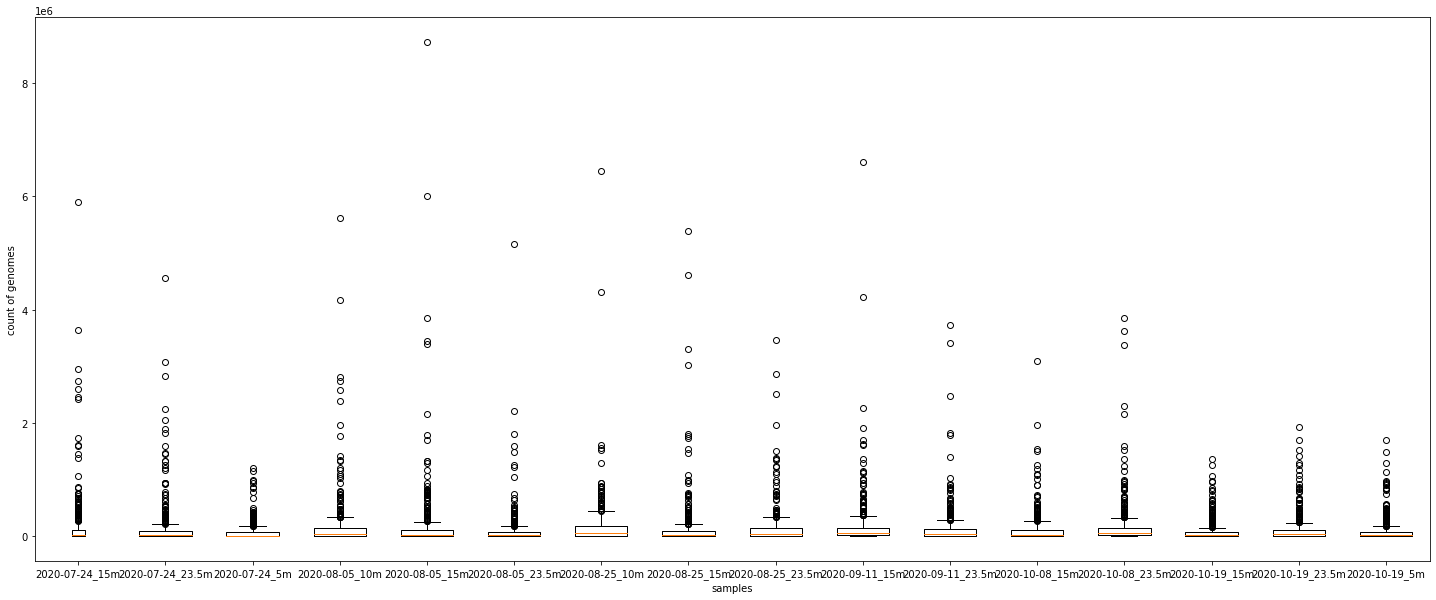

In [67]:

fig, ax = plt.subplots(figsize=(25,10))
# data.iloc[0].plot(kind='box')

# plot first row as boxplot
ax.boxplot(data_sorted.iloc[0])
ax.boxplot(data_sorted.iloc[1],positions=[2], widths=0.6)
ax.boxplot(data_sorted.iloc[2],positions=[3], widths=0.6)
ax.boxplot(data_sorted.iloc[3],positions=[4], widths=0.6)
ax.boxplot(data_sorted.iloc[4],positions=[5], widths=0.6)
ax.boxplot(data_sorted.iloc[5],positions=[6], widths=0.6)
ax.boxplot(data_sorted.iloc[6],positions=[7], widths=0.6)
ax.boxplot(data_sorted.iloc[7],positions=[8], widths=0.6)
ax.boxplot(data_sorted.iloc[8],positions=[9], widths=0.6)
ax.boxplot(data_sorted.iloc[9],positions=[10], widths=0.6)
ax.boxplot(data_sorted.iloc[10],positions=[11], widths=0.6)
ax.boxplot(data_sorted.iloc[11],positions=[12], widths=0.6)
ax.boxplot(data_sorted.iloc[12],positions=[13], widths=0.6)
ax.boxplot(data_sorted.iloc[13],positions=[14], widths=0.6)
ax.boxplot(data_sorted.iloc[14],positions=[15], widths=0.6)
ax.boxplot(data_sorted.iloc[15],positions=[16], widths=0.6)

labels = data_sorted.index
ax.set_xticklabels(labels)

plt.xlabel('samples')
plt.ylabel('count of genomes')
plt.show()
#have more outlier in the middle season

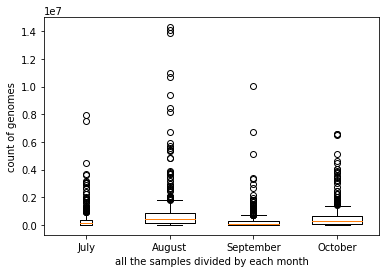

In [68]:
#for each month, count the total
july=data_sorted.iloc[0:3].sum()
aug=data_sorted.iloc[3:9].sum()
sep=data_sorted.iloc[9:11].sum()
october=data_sorted.iloc[11:16].sum()

fig, ax = plt.subplots()

ax.boxplot(july)
ax.boxplot(aug,positions=[2], widths=0.6)
ax.boxplot(sep,positions=[3], widths=0.6)
ax.boxplot(october,positions=[4], widths=0.6)

labels = ['July','August','September','October']
ax.set_xticklabels(labels)

plt.xlabel('all the samples divided by each month')
plt.ylabel('count of genomes')
plt.show()
#august has more outliers than all the other months

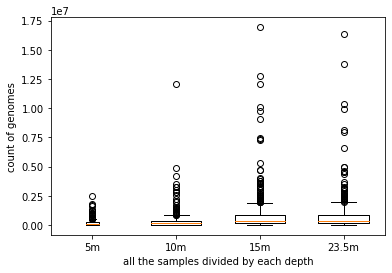

In [69]:
#organized them based on depth 5,10,15,23.5
five=data_sorted.loc[['2020-07-24_5m','2020-10-19_5m']].sum()
ten=data_sorted.loc[['2020-08-25_10m','2020-08-05_10m']].sum()
fifteen=data_sorted.loc[['2020-07-24_15m','2020-08-05_15m','2020-08-25_15m','2020-09-11_15m','2020-10-08_15m','2020-10-19_15m']].sum()
twenth2_5=data_sorted.loc[['2020-07-24_23.5m','2020-08-05_23.5m','2020-08-25_23.5m','2020-09-11_23.5m','2020-10-08_23.5m','2020-10-19_23.5m']].sum()

fig, ax = plt.subplots()
ax.boxplot(five)
ax.boxplot(ten,positions=[2], widths=0.6)
ax.boxplot(fifteen,positions=[3], widths=0.6)
ax.boxplot(twenth2_5,positions=[4], widths=0.6)

labels = ['5m','10m','15m','23.5m']
ax.set_xticklabels(labels)

plt.xlabel('all the samples divided by each depth')
plt.ylabel('count of genomes')
plt.show()
#deper depth more outliers

# Heatmap---genome(ALL) vs. depth(5m,10m,15m,23.5m)

In [70]:
five.name = 'depth5m'
df=five.to_frame()
ten.name = 'depth10m'
df=df.join(ten, how='outer')
fifteen.name = 'depth15m'
df=df.join(fifteen, how='outer')
twenth2_5.name = 'depth23.5m'
df=df.join(twenth2_5, how='outer')
df = df.astype(np.float32)
df

,depth5m,depth10m,depth15m,depth23.5m
Genome,,,,
Ga0485157_maxbin.014,696172.0,1730601.0,901743.0,1205330.0
Ga0485157_maxbin.074_sub,604.0,1476.0,122322.0,40968.0
Ga0485157_maxbin.078,522843.0,232567.0,1070569.0,852388.0
Ga0485157_maxbin.107,438765.0,259628.0,326526.0,301867.0
Ga0485157_maxbin.130_sub,225006.0,247488.0,1128475.0,1036128.0
...,...,...,...,...
Ga0485172_metabat2_ours.064_sub,275400.0,61100.0,781803.0,777811.0
Ga0485172_metabat2_ours.068,151729.0,82895.0,179130.0,93611.0
Ga0485172_metabat2_ours.083,1760698.0,354206.0,3354245.0,2258132.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


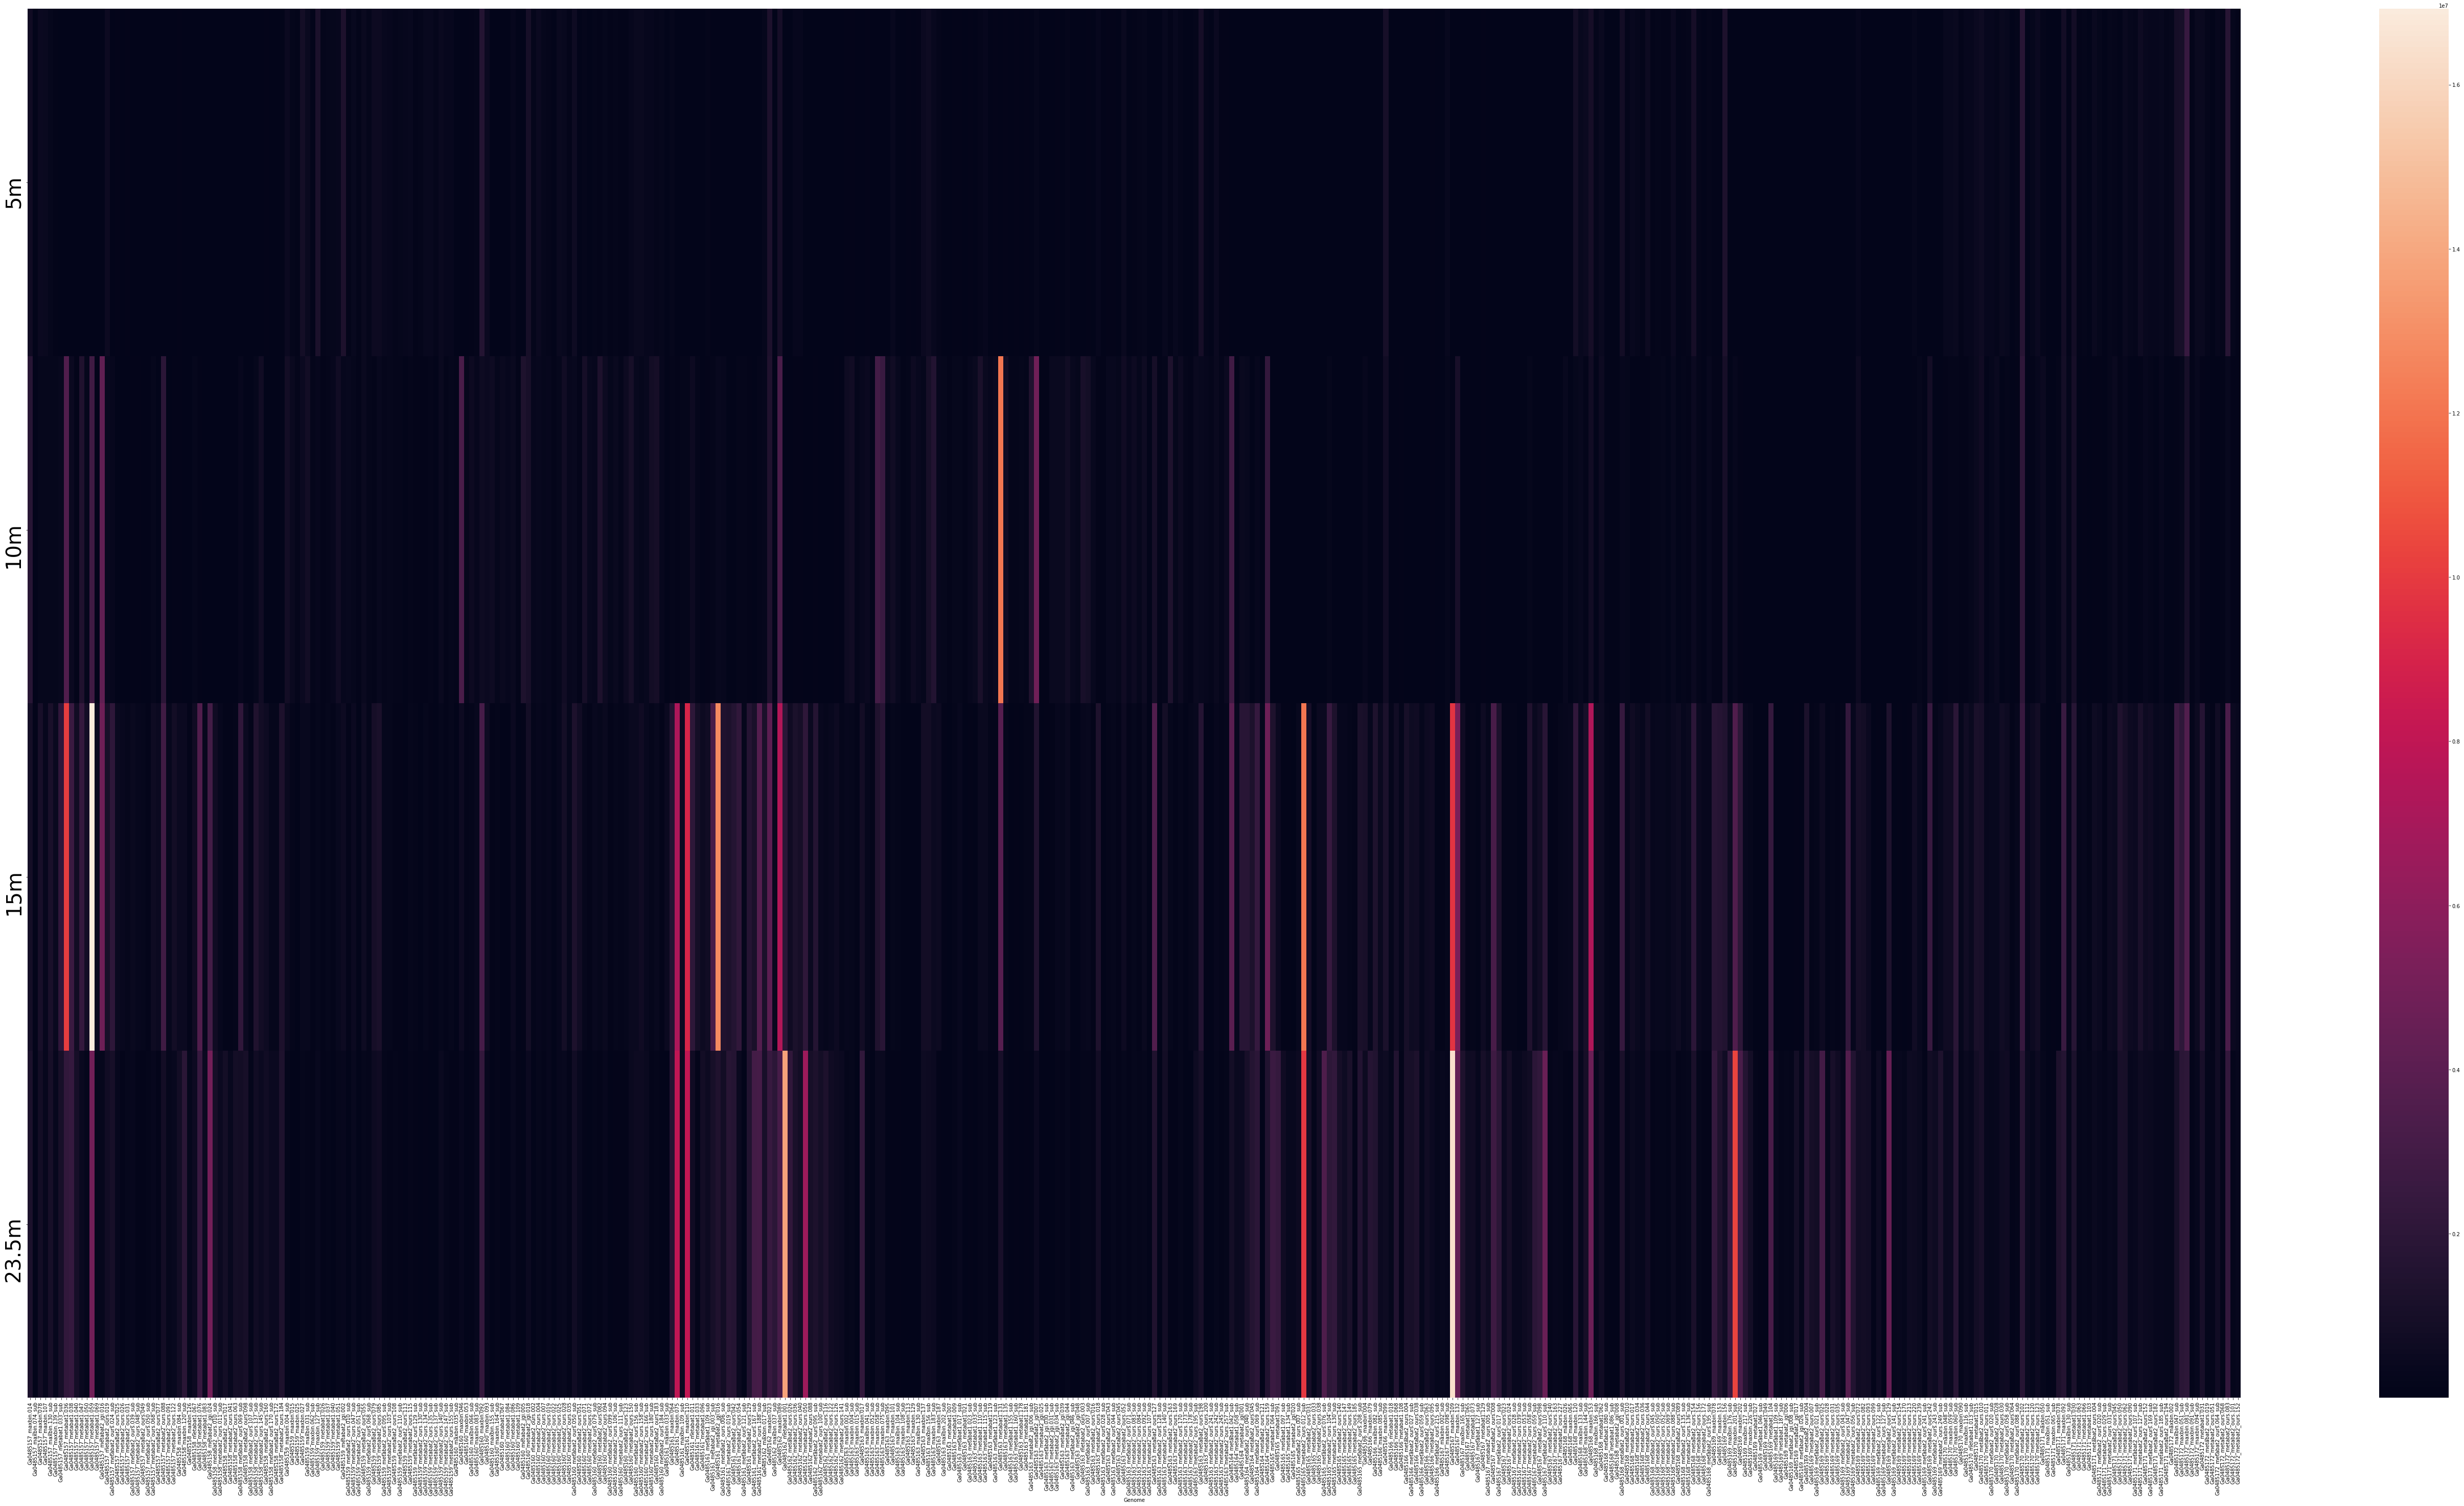

In [84]:
#ploting heatmap for all of the genome vs. depth...
import seaborn as sns
fig, ax = plt.subplots(figsize=(97, 50))
p1 = sns.heatmap(df.T)
ax.set_yticklabels(['5m','10m','15m','23.5m'], fontsize=40)
None

In [85]:
sorted_five = five.sort_values(ascending=False)
sorted_ten = ten.sort_values(ascending=False)
sorted_fifteen = fifteen.sort_values(ascending=False)
sorted_23 = twenth2_5.sort_values(ascending=False)

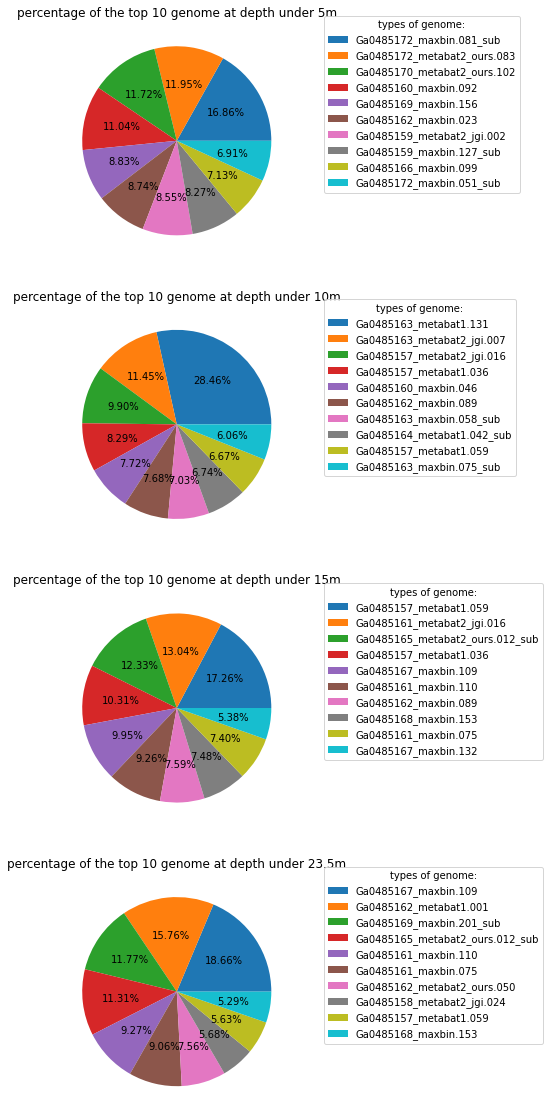

In [86]:
different_depth=[]
five_ =sorted_five[0:10]
_ten =sorted_ten[0:10]
_fifteen =sorted_fifteen[0:10]
_23 =sorted_23[0:10]


fig, (ax1_, ax2_,ax3_,ax4_) = plt.subplots(4, 1,figsize=(20, 20))
ax1_.pie(five_,autopct='%1.2f%%')
for i in five_.index:
    different_depth.append(i)
ax1_.legend(five_.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

# ax2.pie(sd2)
ax2_.pie(_ten,autopct='%1.2f%%')
for i in _ten.index:
    different_depth.append(i)
ax2_.legend(_ten.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

# ax3.pie(sd3)
ax3_.pie(_fifteen,autopct='%1.2f%%')
for i in _fifteen.index:
    different_depth.append(i)
ax3_.legend(_fifteen.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

ax4_.pie(_23,autopct='%1.2f%%')
for i in _23.index:
    different_depth.append(i)
ax4_.legend(_23.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

ax1_.title.set_text('percentage of the top 10 genome at depth under 5m')
ax2_.title.set_text('percentage of the top 10 genome at depth under 10m')
ax3_.title.set_text('percentage of the top 10 genome at depth under 15m')
ax4_.title.set_text('percentage of the top 10 genome at depth under 23.5m')

plt.show()

# Heatmap---genome(top10) vs. depth(5m,10m,15m,23.5m)

In [87]:
five_.name = 'depth5m'
df_top10=five_.to_frame()
_ten.name = 'depth10m'
df_top10=df_top10.join(_ten, how='outer')
_fifteen.name = 'depth15m'
df_top10=df_top10.join(_fifteen, how='outer')
_23.name = 'depth23.5m'
df_top10=df_top10.join(_23, how='outer')
df_top10= df_top10.astype(np.float32)
df_top10

,depth5m,depth10m,depth15m,depth23.5m
Genome,,,,
Ga0485157_metabat1.036,NaN,3517042.0,10108772.0,NaN
Ga0485157_metabat1.059,NaN,2827320.0,16923064.0,4931883.0
Ga0485157_metabat2_jgi.016,NaN,4199000.0,NaN,NaN
Ga0485158_metabat2_jgi.024,NaN,NaN,NaN,4976358.0
Ga0485159_maxbin.127_sub,1217675.0,NaN,NaN,NaN
Ga0485159_metabat2_jgi.002,1259561.0,NaN,NaN,NaN
Ga0485160_maxbin.046,NaN,3273883.0,NaN,NaN
Ga0485160_maxbin.092,1625631.0,NaN,NaN,NaN
Ga0485161_maxbin.075,NaN,NaN,7259583.0,7940873.0


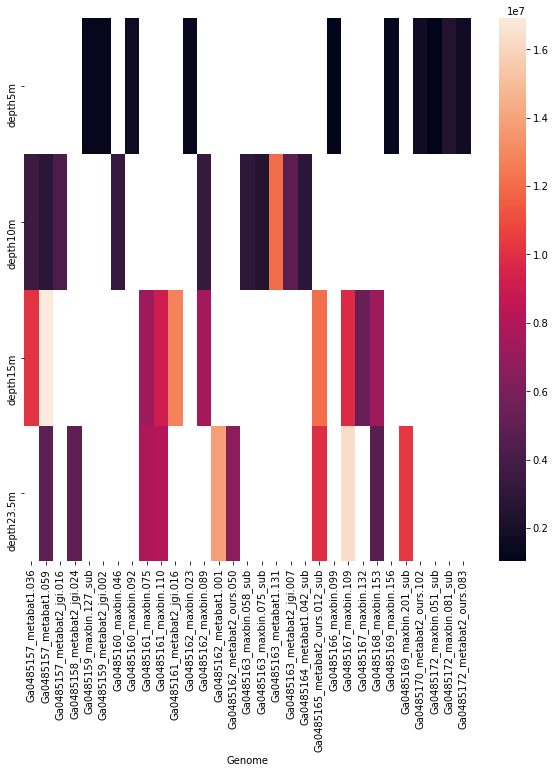

In [88]:
#ploting heatmap for all of the genome vs. depth. However, we are only focusing ont he top 10 this time....
fig, ax = plt.subplots(figsize=(10,10))
p2 = sns.heatmap(df_top10.T)
None

In [89]:
#here we are only focusing on top 10 for each depth
count_top10_depth={}
for i in different_depth:
    if i not in count_top10_depth:
        count_top10_depth[i]=1
    else:
        count_top10_depth[i]+=1
count_top10_depth=dict(sorted(count_top10_depth.items(), key=operator.itemgetter(1),reverse=True))
count_top10_depth

{'Ga0485157_metabat1.059': 3,
 'Ga0485157_metabat1.036': 2,
 'Ga0485162_maxbin.089': 2,
 'Ga0485165_metabat2_ours.012_sub': 2,
 'Ga0485167_maxbin.109': 2,
 'Ga0485161_maxbin.110': 2,
 'Ga0485168_maxbin.153': 2,
 'Ga0485161_maxbin.075': 2,
 'Ga0485172_maxbin.081_sub': 1,
 'Ga0485172_metabat2_ours.083': 1,
 'Ga0485170_metabat2_ours.102': 1,
 'Ga0485160_maxbin.092': 1,
 'Ga0485169_maxbin.156': 1,
 'Ga0485162_maxbin.023': 1,
 'Ga0485159_metabat2_jgi.002': 1,
 'Ga0485159_maxbin.127_sub': 1,
 'Ga0485166_maxbin.099': 1,
 'Ga0485172_maxbin.051_sub': 1,
 'Ga0485163_metabat1.131': 1,
 'Ga0485163_metabat2_jgi.007': 1,
 'Ga0485157_metabat2_jgi.016': 1,
 'Ga0485160_maxbin.046': 1,
 'Ga0485163_maxbin.058_sub': 1,
 'Ga0485164_metabat1.042_sub': 1,
 'Ga0485163_maxbin.075_sub': 1,
 'Ga0485161_metabat2_jgi.016': 1,
 'Ga0485167_maxbin.132': 1,
 'Ga0485162_metabat1.001': 1,
 'Ga0485169_maxbin.201_sub': 1,
 'Ga0485162_metabat2_ours.050': 1,
 'Ga0485158_metabat2_jgi.024': 1}

In [90]:
#sorted genome each month by descedning order
sorted_ser7 = july.sort_values(ascending=False)
sorted_ser8 = aug.sort_values(ascending=False)
sorted_ser9 = sep.sort_values(ascending=False)
sorted_ser10 = october.sort_values(ascending=False)

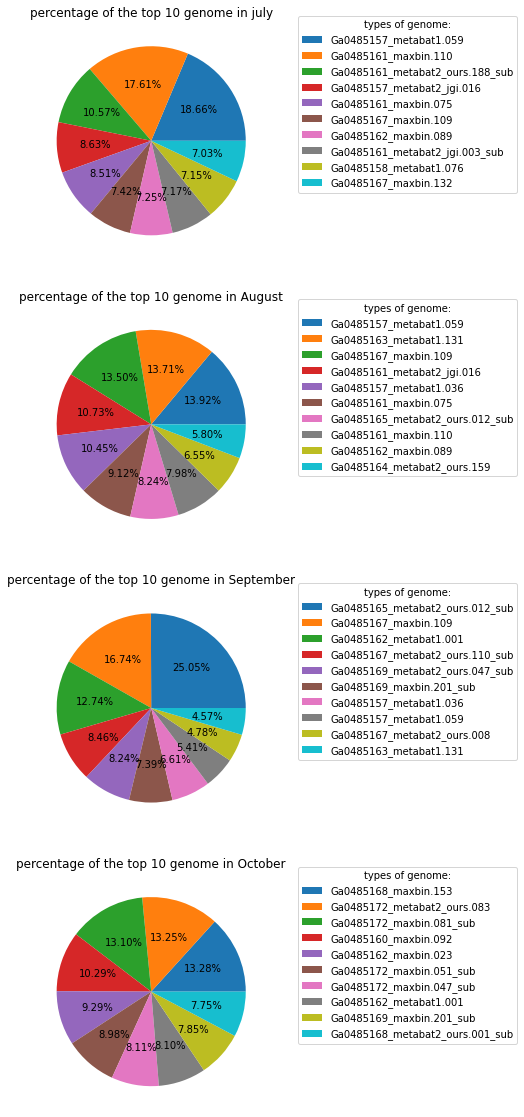

In [91]:
# the percenage of genome different month
different_month=[]
dd11 =sorted_ser7[0:10]
dd21 =sorted_ser8[0:10]
dd31 =sorted_ser9[0:10]
dd41 =sorted_ser10[0:10]


fig, (ax1_, ax2_,ax3_,ax4_) = plt.subplots(4, 1,figsize=(20, 20))
ax1_.pie(dd11,autopct='%1.2f%%')
for i in dd11.index:
    different_month.append(i)
ax1_.legend(dd11.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

# ax2.pie(sd2)
ax2_.pie(dd21,autopct='%1.2f%%')
for i in dd21.index:
    different_month.append(i)
ax2_.legend(dd21.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

# ax3.pie(sd3)
ax3_.pie(dd31,autopct='%1.2f%%')
for i in dd31.index:
    different_month.append(i)
ax3_.legend(dd31.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

ax4_.pie(dd41,autopct='%1.2f%%')
for i in dd31.index:
    different_month.append(i)
ax4_.legend(dd41.index,title = "types of genome:",bbox_to_anchor=(1.1, 1.05))

ax1_.title.set_text('percentage of the top 10 genome in july')
ax2_.title.set_text('percentage of the top 10 genome in August')
ax3_.title.set_text('percentage of the top 10 genome in September')
ax4_.title.set_text('percentage of the top 10 genome in October')

plt.show()

In [92]:
#here we are only focusing on top 10 for each month
count_top10_month={}
for i in different_month:
    if i not in count_top10_month:
        count_top10_month[i]=1
    else:
        count_top10_month[i]+=1
count_top10_month=dict(sorted(count_top10_month.items(), key=operator.itemgetter(1),reverse=True))
count_top10_month

{'Ga0485157_metabat1.059': 4,
 'Ga0485167_maxbin.109': 4,
 'Ga0485163_metabat1.131': 3,
 'Ga0485157_metabat1.036': 3,
 'Ga0485165_metabat2_ours.012_sub': 3,
 'Ga0485161_maxbin.110': 2,
 'Ga0485161_maxbin.075': 2,
 'Ga0485162_maxbin.089': 2,
 'Ga0485162_metabat1.001': 2,
 'Ga0485167_metabat2_ours.110_sub': 2,
 'Ga0485169_metabat2_ours.047_sub': 2,
 'Ga0485169_maxbin.201_sub': 2,
 'Ga0485167_metabat2_ours.008': 2,
 'Ga0485161_metabat2_ours.188_sub': 1,
 'Ga0485157_metabat2_jgi.016': 1,
 'Ga0485161_metabat2_jgi.003_sub': 1,
 'Ga0485158_metabat1.076': 1,
 'Ga0485167_maxbin.132': 1,
 'Ga0485161_metabat2_jgi.016': 1,
 'Ga0485164_metabat2_ours.159': 1}

In [93]:
dd11.name = 'July'
df_top10_month=dd11.to_frame()
dd21.name = 'August'
df_top10_month=df_top10_month.join(dd21, how='outer')
dd31.name = 'September'
df_top10_month=df_top10_month.join(dd31, how='outer')
dd41.name = 'October'
df_top10_month=df_top10_month.join(dd41, how='outer')
df_top10_month= df_top10_month.astype(np.float32)
df_top10_month

,July,August,September,October
Genome,,,,
Ga0485157_metabat1.036,NaN,10718180.0,2643618.0,NaN
Ga0485157_metabat1.059,7956555.0,14287798.0,2164705.0,NaN
Ga0485157_metabat2_jgi.016,3681555.0,NaN,NaN,NaN
Ga0485158_metabat1.076,3050543.0,NaN,NaN,NaN
Ga0485160_maxbin.092,NaN,NaN,NaN,5105198.0
Ga0485161_maxbin.075,3627331.0,9362433.0,NaN,NaN
Ga0485161_maxbin.110,7510673.0,8185054.0,NaN,NaN
Ga0485161_metabat2_jgi.003_sub,3056348.0,NaN,NaN,NaN
Ga0485161_metabat2_jgi.016,NaN,11013759.0,NaN,NaN


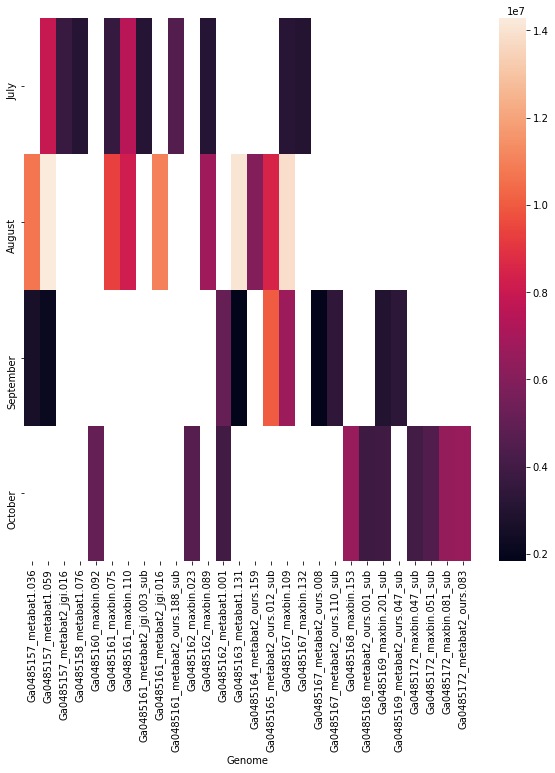

In [94]:
#ploting heatmap for all of the genome vs. month. However, we are only focusing ont he top 10 this time....
fig, ax = plt.subplots(figsize=(10,10))
p3 = sns.heatmap(df_top10_month.T)
None

In [95]:
data_sorted

Genome,Ga0485157_maxbin.014,Ga0485157_maxbin.074_sub,Ga0485157_maxbin.078,Ga0485157_maxbin.107,Ga0485157_maxbin.130_sub,Ga0485157_maxbin.139_sub,Ga0485157_metabat1.033_sub,Ga0485157_metabat1.036,Ga0485157_metabat1.038,Ga0485157_metabat1.040,...,Ga0485172_maxbin.091_sub,Ga0485172_maxbin.094_sub,Ga0485172_metabat1.031,Ga0485172_metabat2_ours.019,Ga0485172_metabat2_ours.051,Ga0485172_metabat2_ours.064_sub,Ga0485172_metabat2_ours.068,Ga0485172_metabat2_ours.083,Ga0485172_metabat2_ours.101,Ga0485172_metabat2_ours.152
2020-07-24_15m,312670,92010,174684,62506,275145,192646,742934,1381224,748896,423415,...,2683,30075,176785,31853,44338,18976,7535,216503,13121,159133
2020-07-24_23.5m,186670,28941,88014,24601,161421,45468,457820,542540,920121,135709,...,1704,15432,304788,9978,26700,5961,2150,91971,5491,35477
2020-07-24_5m,672567,108,107239,379191,85609,43725,2382,8850,2905,1093,...,14986,275103,57297,3141,1768,562,41932,66300,25860,6007
2020-08-05_10m,797944,1121,43738,124573,158200,133505,268479,2574816,216942,74660,...,22322,118658,53849,5372,2340,38168,14775,108636,6838,55149
2020-08-05_15m,125718,25795,55400,23701,184051,47396,725393,3392127,1069140,131436,...,3715,21184,30097,2498,10754,12088,6115,99934,4693,31929
2020-08-05_23.5m,152916,6702,67242,36246,140875,27860,198556,318575,460417,104251,...,3785,13076,201327,6614,19010,3092,2516,62757,3199,27831
2020-08-25_10m,932657,355,188829,135055,89288,120811,70819,942226,287950,16272,...,89200,257952,25380,25438,5179,22932,68120,245570,93655,31169
2020-08-25_15m,149383,2413,37886,19780,176946,41036,405062,3031265,311711,58312,...,7396,19681,31343,2732,8137,9172,7158,75146,3291,28465
2020-08-25_23.5m,338764,2767,78807,48360,172887,39964,183241,459171,468068,219838,...,9090,20986,75307,5690,21302,4912,4488,62367,3320,40182
2020-09-11_15m,221944,1056,63198,37802,242087,54164,252651,2262445,494337,136806,...,14228,24254,34342,3179,11535,45766,9845,80612,5709,43216


<AxesSubplot: >

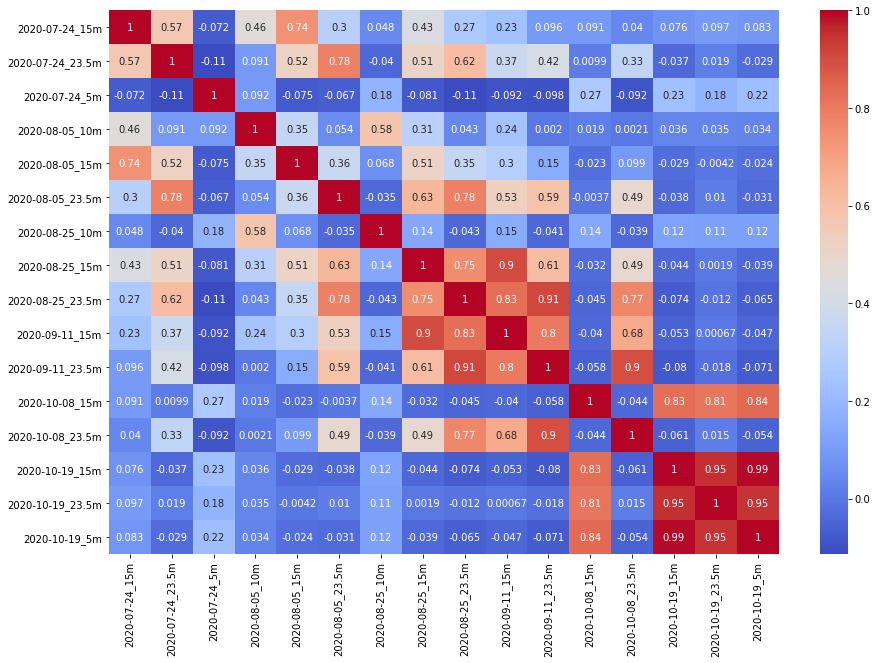

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
data_sorted_=data_sorted.T.astype(np.float32)
corr=data_sorted_.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')